In [14]:
import pandas as pd

In [15]:
df=pd.read_csv(r'C:\Users\RohitP\Downloads\PROJECTS\Car-Price-Prediction-main\car data.csv')

In [16]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [17]:
df['no_year']=2020-df['Year']

In [18]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [19]:
df.drop(['Car_Name','Year'],axis=1,inplace=True)

In [20]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [21]:
df=pd.get_dummies(df)

In [22]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,6,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,7,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,3,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,9,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,6,0,1,0,1,0,0,1


In [23]:
x=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [24]:
x.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,5.59,27000,0,6,0,0,1,1,0,0,1
1,9.54,43000,0,7,0,1,0,1,0,0,1
2,9.85,6900,0,3,0,0,1,1,0,0,1
3,4.15,5200,0,9,0,0,1,1,0,0,1
4,6.87,42450,0,6,0,1,0,1,0,0,1


In [25]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=5)

In [28]:
x_train.shape , y_train.shape

((225, 11), (225,))

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
prediction = lr.predict(x_test)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

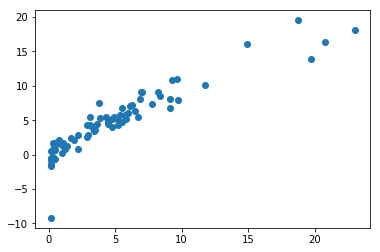

In [33]:
plt.scatter(y_test,prediction)

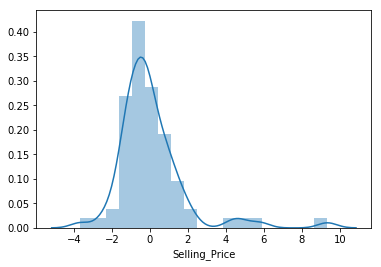

In [34]:
sns.distplot(y_test-prediction)

In [35]:
from sklearn import metrics
import numpy as np

In [36]:
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  1.1409961087859033
MSE:  3.2815963416575293
RMSE:  1.8115176901309933
R squared:  0.8608525898499432


In [37]:
from sklearn.linear_model import Ridge

In [38]:
ridge=Ridge()
ridge.fit(x_train,y_train)
prediction = ridge.predict(x_test)

In [39]:
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  1.1332339163458565
MSE:  3.27382664365264
RMSE:  1.809371892025694
R squared:  0.8611820433361335


In [40]:
from sklearn.linear_model import Lasso

In [41]:
ridge=Lasso()
ridge.fit(x_train,y_train)
prediction = ridge.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  1.3349151159008388
MSE:  4.473136814451778
RMSE:  2.114979152249917
R squared:  0.8103284687770422


In [42]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [43]:
r=Ridge()
parameters={'alpha':[1,20]}
l=RandomizedSearchCV(r,parameters,scoring="neg_mean_squared_error",cv=5)
l.fit(x_train,y_train)
prediction = l.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

C:\Users\RohitP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


MAE:  1.1187640189415795
MSE:  3.2349381933942603
RMSE:  1.79859339301418
R squared:  0.8628310051750748


In [44]:
r=Ridge()
parameters={'alpha':[1000,100,30,40,50]}
l=GridSearchCV(r,parameters,scoring="neg_mean_squared_error",cv=5)
l.fit(x_train,y_train)
prediction = l.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  1.1194605545945524
MSE:  3.235117272776871
RMSE:  1.798643175501153
R squared:  0.8628234117876782


In [45]:
l.best_params_

{'alpha': 30}

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [48]:
r=RandomForestRegressor(n_estimators=100)
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train,y_train)
prediction = rf_random.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.6min finished


MAE:  0.5670285526315818
MSE:  1.076134684975002
RMSE:  1.0373691170335668
R squared:  0.954369356009434


In [49]:
r=RandomForestRegressor(n_estimators=100)

r.fit(x_train,y_train)
prediction = r.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  0.5101118421052637
MSE:  0.7803117109210531
RMSE:  0.8833525405641018
R squared:  0.9669129465113977


In [50]:
import pickle 
pickle.dump(r,open('model.pkl','wb'))